### Import Libraries

This cell imports all necessary libraries for data processing, machine learning, and visualization. Specifically, it includes:
- `pandas` for data manipulation
- `sklearn` for model training, preprocessing, and evaluation
- `matplotlib` and `seaborn` for visualizing results and setting the plot style to a clean white grid layout


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")


### Define the Preprocessing Function

This cell defines the `preprocess_opcodes` function, which loads and cleans the dataset from a CSV file.
- The function reads the file and extracts two lists: `data`, containing opcode sequences, and `labels`, containing labels for each sequence.
- The `file_path` parameter allows the user to specify the location of the dataset.
- This function returns the cleaned lists `data` and `labels`, ready for further processing.


In [2]:
# Preprocessing function - reads and cleans data
def preprocess_opcodes(file_path):
    """
    Load the dataset from the CSV file, and extract opcodes and labels.

    Args:
        file_path (str): Path to the CSV file containing the data.

    Returns:
        data (list): A list of opcode sequences (each entry is a string of opcodes).
        labels (list): A list of labels (APT groups) corresponding to each opcode sequence.
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Extract the opcodes and labels as lists
    data = df['Opcodes'].tolist()
    labels = df['APT'].tolist()
    return data, labels


### Load and Split Data

Here, we load the opcode data using the `preprocess_opcodes` function and then split it into training and testing sets.
- The dataset is divided into 80% training data and 20% testing data to ensure that the model can be evaluated on unseen data.
- We set a `random_state` for reproducibility of the results.


In [3]:
# Load and preprocess data from CSV file
data, labels = preprocess_opcodes('opcodes.csv')

# Display the first few rows of loaded data and labels
print("First 5 Opcodes:", data[:5])
print("First 5 Labels:", labels[:5])

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Display the sizes of each split
print("Training Data Size:", len(X_train))
print("Testing Data Size:", len(X_test))


First 5 Opcodes: ['mov,push,push,mov,or,xor,repnz,not,dec,mov,test,jle,mov,push,mov,xor,mov,inc,cmp,jl,pop,pop,pop,ret,nop,nop,push,push,call,push,push,call,add,ret,nop,nop,nop,nop,sub,lea,push,push,call,test,sete,add,ret,nop,nop,nop,nop,nop,nop,nop,nop,nop,nop,nop,nop,nop,nop,sub,call,call,test,jne,xor,add,ret,xor,push,mov,push,mov,mov,mov,call,cmp,jne,push,push,call,push,push,push,push,mov,xor,lea,movb,rep,stos,lea,push,push,push,stos,call,or,mov,xor,lea,repnz,not,sub,mov,mov,or,mov,repnz,mov,dec,shr,rep,mov,lea,and,rep,lea,or,repnz,not,sub,mov,mov,mov,lea,shr,rep,mov,xor,and,rep,mov,or,repnz,not,sub,mov,mov,mov,or,repnz,mov,dec,shr,rep,mov,lea,and,rep,lea,or,repnz,not,sub,mov,mov,mov,shr,rep,mov,and,rep,or,mov,xor,lea,repnz,not,sub,mov,mov,or,mov,repnz,mov,dec,shr,rep,mov,lea,and,rep,or,lea,repnz,not,sub,mov,mov,shr,mov,lea,rep,mov,xor,and,rep,mov,or,repnz,not,sub,mov,mov,mov,or,repnz,mov,dec,shr,rep,mov,lea,and,rep,lea,or,repnz,not,sub,mov,mov,mov,lea,shr,rep,mov,xor,and,rep,mov,or

### Define Feature Extraction Function

This cell defines the `extract_features` function, which converts text sequences of opcodes into numerical feature vectors using the `CountVectorizer`.
- It allows for the use of n-grams by specifying the `ngram` parameter, supporting both 1-Gram (single words) and 2-Gram (two-word combinations) representations.
- The `CountVectorizer` learns the vocabulary from the training data and then applies this vocabulary to the test data to ensure consistent feature extraction.


In [4]:
# Feature extraction function - ensures that the same CountVectorizer is used for both training and testing
def extract_features(train_data, test_data, ngram=1):
    """
    Convert opcode sequences to feature vectors using n-grams.

    Args:
        train_data (list): List of training opcode sequences.
        test_data (list): List of testing opcode sequences.
        ngram (int): The size of n-grams to be used (1 for 1-gram, 2 for 2-gram, etc.).

    Returns:
        X_train (sparse matrix): Transformed training data into feature vectors.
        X_test (sparse matrix): Transformed testing data into feature vectors.
    """
    vectorizer = CountVectorizer(ngram_range=(ngram, ngram))
    X_train = vectorizer.fit_transform(train_data)
    X_test = vectorizer.transform(test_data)
    return X_train, X_test


### Extract 1-Gram and 2-Gram Features

This cell uses the `extract_features` function to convert the opcode sequences into feature vectors, which can be used to train machine learning models.
- We extract both 1-Gram and 2-Gram features separately, creating distinct representations for further comparison.
- These feature matrices are saved as `X_train_1gram`, `X_test_1gram`, `X_train_2gram`, and `X_test_2gram`.


In [5]:
# Extract 1-Gram features
X_train_1gram, X_test_1gram = extract_features(X_train, X_test, ngram=1)

# Extract 2-Gram features
X_train_2gram, X_test_2gram = extract_features(X_train, X_test, ngram=2)


### Standardize Features

In this cell, we apply standardization to the feature matrices to improve model performance and stability.
- `StandardScaler` is used without mean adjustment (suitable for sparse matrices) to transform each feature to have unit variance.
- Each n-gram feature set (1-Gram and 2-Gram) is standardized separately for both the training and testing data.


In [6]:
# Standardize (normalize) the extracted features
scaler_1gram = StandardScaler(with_mean=False)  # Initialize scaler without mean adjustment for sparse data
X_train_1gram = scaler_1gram.fit_transform(X_train_1gram)
X_test_1gram = scaler_1gram.transform(X_test_1gram)

scaler_2gram = StandardScaler(with_mean=False)
X_train_2gram = scaler_2gram.fit_transform(X_train_2gram)
X_test_2gram = scaler_2gram.transform(X_test_2gram)


### Define Model Evaluation Function

This cell defines `evaluate_model`, a function that trains a machine learning model and evaluates its performance.
- The function calculates key performance metrics: `accuracy`, `recall`, `precision`, and `F1 score`.
- It also generates a confusion matrix to visualize the model's predictions compared to the true labels.
- The results are printed and visualized with a heatmap, allowing for easy interpretation of model performance.


In [8]:
# Define a function to evaluate models and display metrics and confusion matrix
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train a model, evaluate its performance on test data, and display metrics and confusion matrix.

    Args:
        model: Machine learning model to be trained and evaluated.
        X_train: Training data features.
        X_test: Testing data features.
        y_train: Training data labels.
        y_test: Testing data labels.
        model_name (str): Name of the model for labeling purposes.

    Returns:
        accuracy, recall, precision, f1 (float): The calculated performance metrics.
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix without normalization

    # Print metrics for each model
    print(f"{model_name} - Accuracy: {accuracy}")
    print(f"{model_name} - Recall: {recall}")
    print(f"{model_name} - Precision: {precision}")
    print(f"{model_name} - F1 Score: {f1}")

    # Plot confusion matrix for visual insight into predictions
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy, recall, precision, f1


### Initialize and Evaluate Models on 1-Gram Features

This cell initializes three machine learning models: Support Vector Classifier (SVM), K-Nearest Neighbors (KNN with k=3), and Decision Tree.
- Each model is evaluated on the 1-Gram feature representation of the data.
- The `evaluate_model` function is called for each model, storing the metrics results in a dictionary.


1-Gram Features:
SVM (1-Gram) - Accuracy: 0.4219409282700422
SVM (1-Gram) - Recall: 0.4219409282700422
SVM (1-Gram) - Precision: 0.37828431072789903
SVM (1-Gram) - F1 Score: 0.30127377968543223


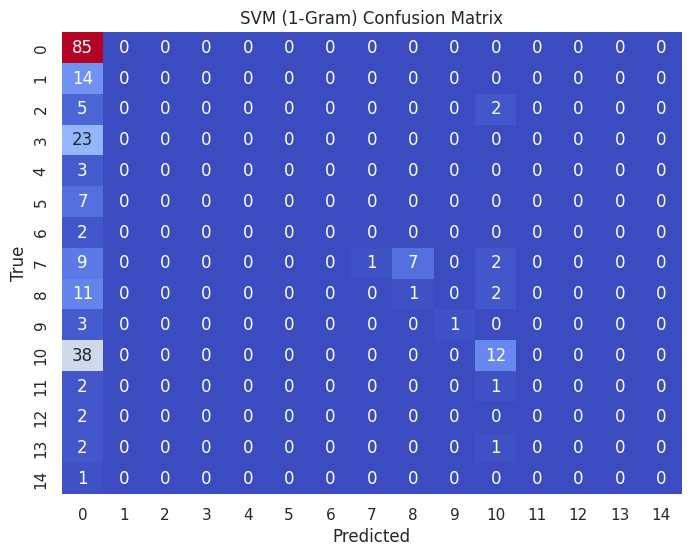

KNN (1-Gram) - Accuracy: 0.6540084388185654
KNN (1-Gram) - Recall: 0.6540084388185654
KNN (1-Gram) - Precision: 0.6280409632713896
KNN (1-Gram) - F1 Score: 0.6233670220090135


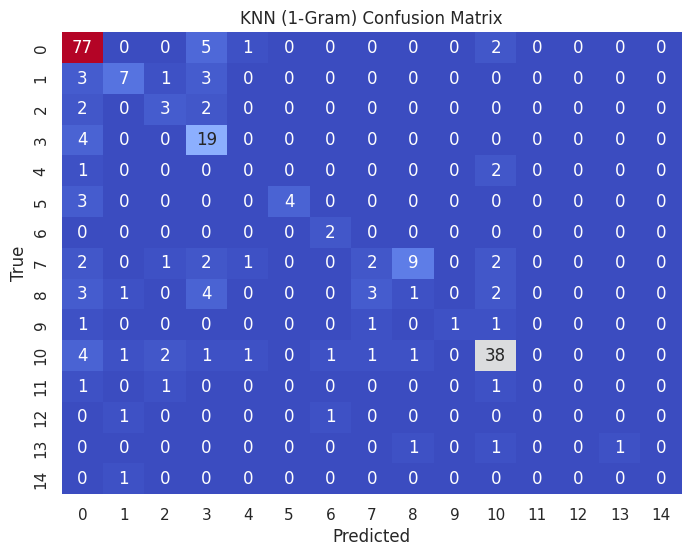

Decision Tree (1-Gram) - Accuracy: 0.7721518987341772
Decision Tree (1-Gram) - Recall: 0.7721518987341772
Decision Tree (1-Gram) - Precision: 0.8207446655478173
Decision Tree (1-Gram) - F1 Score: 0.7907949509870154


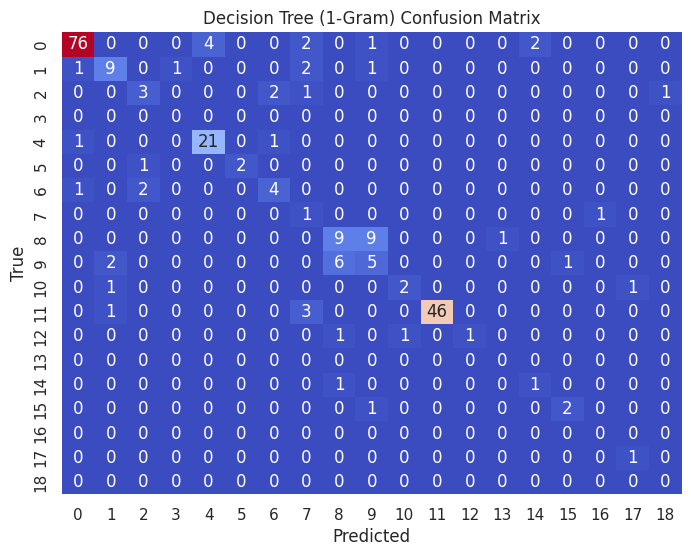

In [9]:
# Initialize the machine learning models to be evaluated
svm_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier()

# Dictionary to store results for visualization
results = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}

# Evaluate models on 1-Gram features
print("1-Gram Features:")
for model, name in zip([svm_model, knn_model, dt_model], ["SVM (1-Gram)", "KNN (1-Gram)", "Decision Tree (1-Gram)"]):
    acc, rec, prec, f1 = evaluate_model(model, X_train_1gram, X_test_1gram, y_train, y_test, name)
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Recall'].append(rec)
    results['Precision'].append(prec)
    results['F1 Score'].append(f1)


### Evaluate Models on 2-Gram Features

In this cell, we re-evaluate the models (SVM, KNN, Decision Tree) using the 2-Gram feature representation.
- This process allows us to compare model performance between 1-Gram and 2-Gram features, helping to determine which n-gram representation is more effective for each model.


2-Gram Features:
SVM (2-Gram) - Accuracy: 0.43037974683544306
SVM (2-Gram) - Recall: 0.43037974683544306
SVM (2-Gram) - Precision: 0.4094679427806936
SVM (2-Gram) - F1 Score: 0.31563174688447493


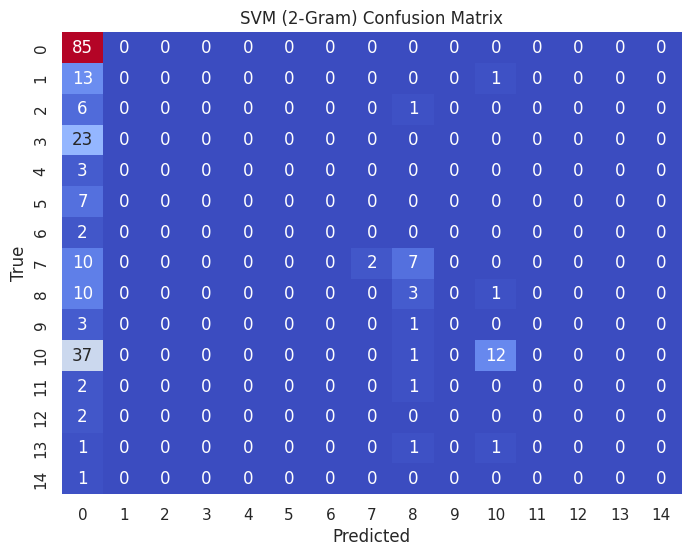

KNN (2-Gram) - Accuracy: 0.6835443037974683
KNN (2-Gram) - Recall: 0.6835443037974683
KNN (2-Gram) - Precision: 0.6649278447155131
KNN (2-Gram) - F1 Score: 0.6532655002692662


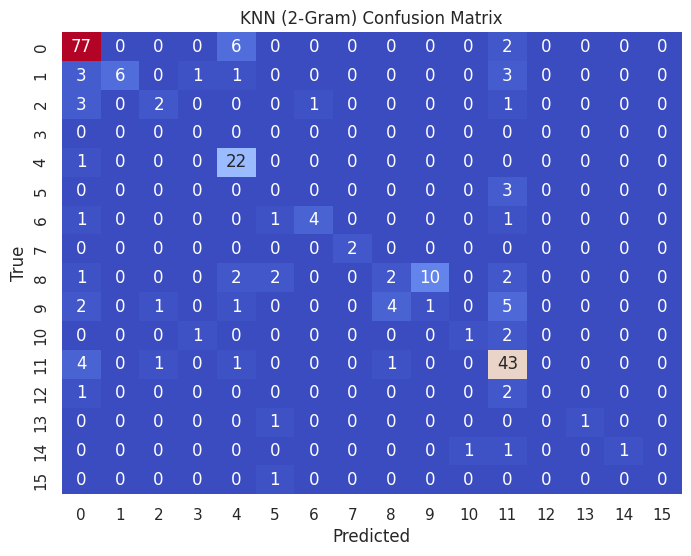

Decision Tree (2-Gram) - Accuracy: 0.810126582278481
Decision Tree (2-Gram) - Recall: 0.810126582278481
Decision Tree (2-Gram) - Precision: 0.8243948029050976
Decision Tree (2-Gram) - F1 Score: 0.8088577964452395


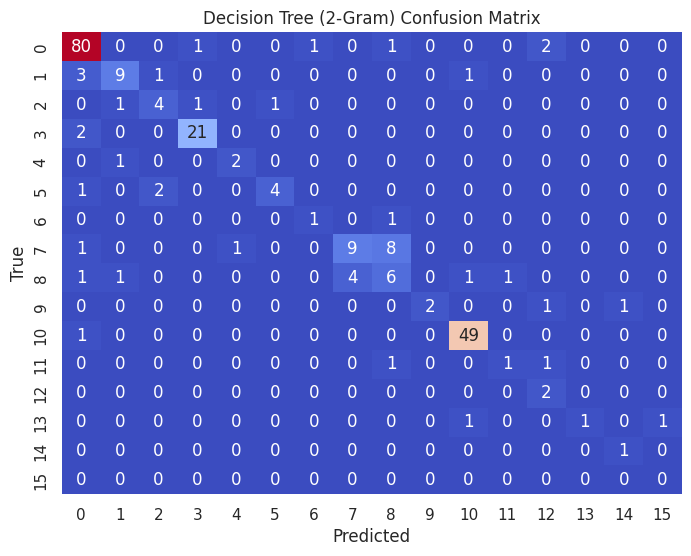

In [10]:
# Evaluate models on 2-Gram features
print("2-Gram Features:")
for model, name in zip([svm_model, knn_model, dt_model], ["SVM (2-Gram)", "KNN (2-Gram)", "Decision Tree (2-Gram)"]):
    acc, rec, prec, f1 = evaluate_model(model, X_train_2gram, X_test_2gram, y_train, y_test, name)
    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['Recall'].append(rec)
    results['Precision'].append(prec)
    results['F1 Score'].append(f1)


### Visualize Results

This cell visualizes the performance metrics (accuracy, recall, precision, F1 score) of each model for both 1-Gram and 2-Gram features.
- The metrics are plotted in a 2x2 grid of bar plots, one for each metric.
- This summary visualization helps us compare and interpret the performance of each model across different feature representations.


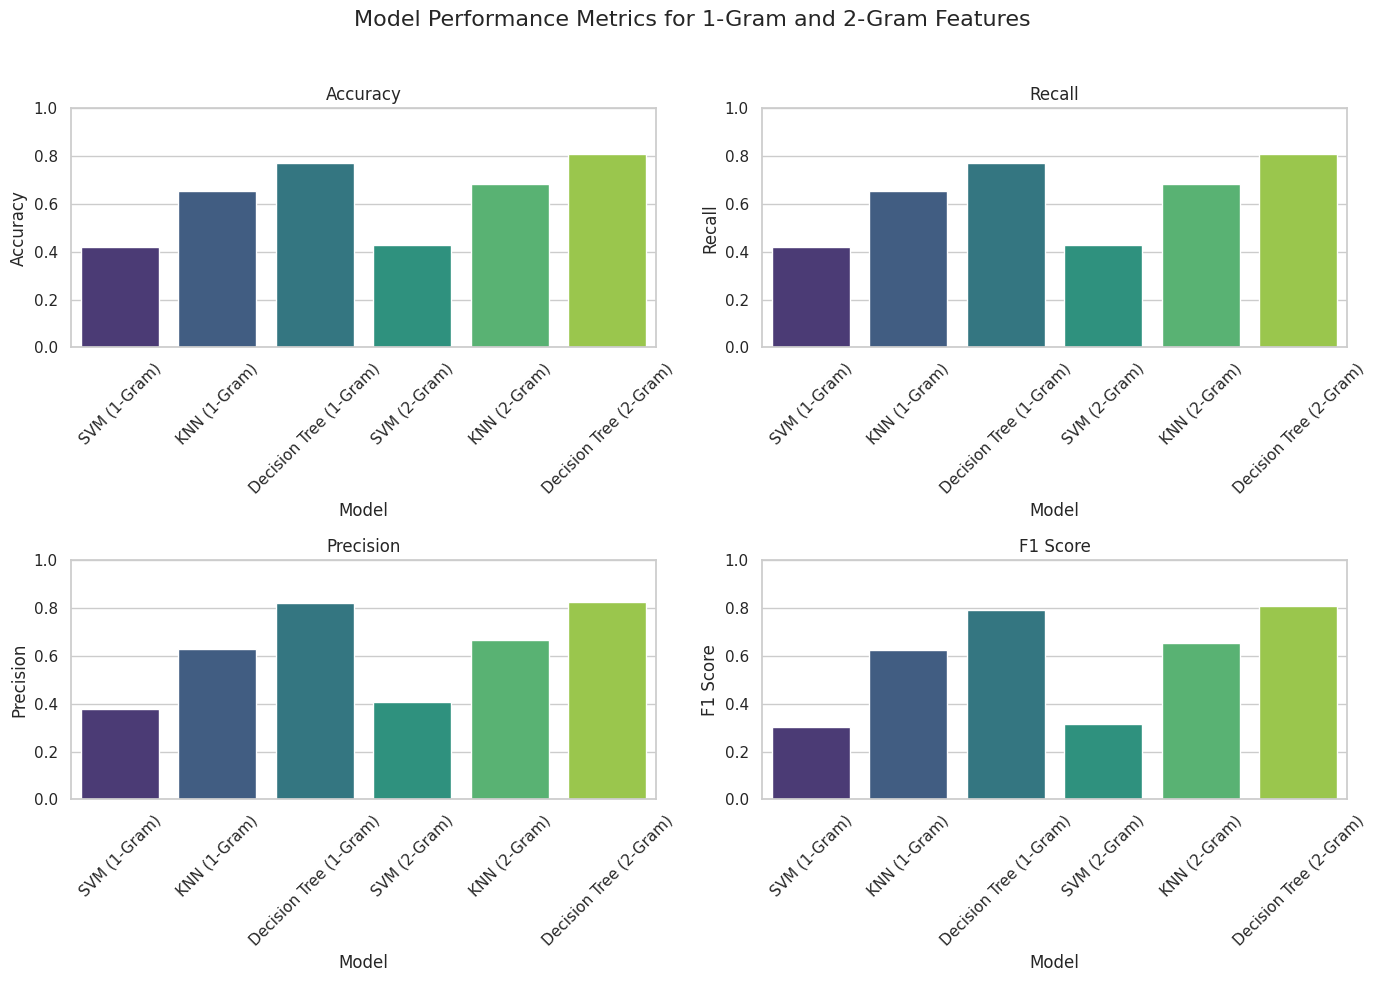

In [11]:
# Convert results into a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Plot the performance metrics for each model
plt.figure(figsize=(14, 10))
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # Create subplot for each metric
    sns.barplot(x='Model', y=metric, data=results_df, hue='Model', dodge=False, palette="viridis")
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Set y-axis limits to 0-1 for consistency across metrics
    plt.legend([], [], frameon=False)  # Hide legend for simplicity

# Set a main title for the entire figure
plt.suptitle("Model Performance Metrics for 1-Gram and 2-Gram Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


## SUBMISSION 5
CNN model based on Deep Android Malware Detection paper.

the cnn model in this notebook does not use 1-hot embedding,
but it uses convolutional layers using Conv1D
and connected layers with relu activation.
The classification layers in the CNN model are:
  Flatten() ,
  Dense(_,activation='relu') ,
  Dense(len(set(y_train)), activation='softmax')

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from sklearn.preprocessing import LabelEncoder

In [8]:
#encode the labels:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reshape the input data for the CNN
# 1-gram
X_train_1gram_cnn = X_train_1gram.toarray().reshape(X_train_1gram.shape[0], X_train_1gram.shape[1], 1)
X_test_1gram_cnn = X_test_1gram.toarray().reshape(X_test_1gram.shape[0], X_test_1gram.shape[1], 1)
#2-gram
X_train_2gram_cnn = X_train_2gram.toarray().reshape(X_train_2gram.shape[0], X_train_2gram.shape[1], 1)
X_test_2gram_cnn = X_test_2gram.toarray().reshape(X_test_2gram.shape[0], X_test_2gram.shape[1], 1)

In [10]:
# Define the 1-gram CNN model
cnn_model_1gram = Sequential()
cnn_model_1gram.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_1gram_cnn.shape[1], 1)))
cnn_model_1gram.add(MaxPooling1D(pool_size=2))
cnn_model_1gram.add(Flatten())
cnn_model_1gram.add(Dense(128, activation='relu'))
cnn_model_1gram.add(Dropout(0.5))
cnn_model_1gram.add(Dense(64, activation='relu'))
cnn_model_1gram.add(Dropout(0.5))
cnn_model_1gram.add(Dense(len(set(y_train)), activation='softmax'))  # Output layer with the number of malware families

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Define the 2-gram CNN model
cnn_model_2gram = Sequential()
cnn_model_2gram.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_2gram_cnn.shape[1], 1)))
cnn_model_2gram.add(MaxPooling1D(pool_size=2))
cnn_model_2gram.add(Flatten())
cnn_model_2gram.add(Dense(64, activation='relu'))
cnn_model_2gram.add(Dropout(0.5))
cnn_model_2gram.add(Dense(32, activation='relu'))
cnn_model_2gram.add(Dense(len(set(y_train)), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the 1-gram model
cnn_model_1gram.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Compile the 2-gram CNN model
cnn_model_2gram.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
#train 1-gram cnn
cnn_model_1gram.fit(X_train_1gram_cnn, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_1gram_cnn, y_test_encoded))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1485 - loss: 5.8620 - val_accuracy: 0.4768 - val_loss: 2.2844
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.3343 - loss: 4.8945 - val_accuracy: 0.5738 - val_loss: 2.0022
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3699 - loss: 8.0851 - val_accuracy: 0.5316 - val_loss: 1.7538
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4383 - loss: 3.6847 - val_accuracy: 0.5738 - val_loss: 1.6357
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4976 - loss: 3.0459 - val_accuracy: 0.5738 - val_loss: 1.5366
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5001 - loss: 3.1936 - val_accuracy: 0.5781 - val_loss: 1.4631
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5178 - loss: 2.8328 - val_accuracy: 0.5865 - val_loss: 1.4539
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5853 - loss: 2.5889 - val_accuracy: 0.5823 - val_loss:

In [13]:
# Train the 2-gram CNN model
cnn_model_2gram.fit(X_train_2gram_cnn, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_2gram_cnn, y_test_encoded))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 211s 7s/step - accuracy: 0.5217 - loss: 2.2349 - val_accuracy: 0.6287 - val_loss: 2.8878
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 198s 7s/step - accuracy: 0.5756 - loss: 2.0115 - val_accuracy: 0.6456 - val_loss: 1.9912
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step - accuracy: 0.5621 - loss: 1.8144 - val_accuracy: 0.6414 - val_loss: 1.7788
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 210s 7s/step - accuracy: 0.5588 - loss: 1.9887 - val_accuracy: 0.6456 - val_loss: 1.5999
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 263s 7s/step - accuracy: 0.5887 - loss: 1.6002 - val_accuracy: 0.6709 - val_loss: 1.5980
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 258s 7s/step - accuracy: 0.6201 - loss: 1.5071 - val_accuracy: 0.6835 - val_loss: 1.3685
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step - accuracy: 0.5998 - loss: 1.3928 - val_accuracy: 0.6582 - val_loss: 1.1860
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.6063 - loss: 1.3911 - val_accuracy: 0.6709 - v

In [15]:
# Evaluate the 1-gram cnn model
loss, accuracy = cnn_model_1gram.evaluate(X_test_1gram_cnn, y_test_encoded, verbose=0)
print(f"1-Gram CNN Model - Accuracy: {accuracy}")

# Evaluate the 2-gram CNN model
loss, accuracy = cnn_model_2gram.evaluate(X_test_2gram_cnn,y_test_encoded, verbose=0)
print(f"2-Gram CNN Model - Accuracy: {accuracy}")

2-Gram CNN Model - Accuracy: 0.6877636909484863


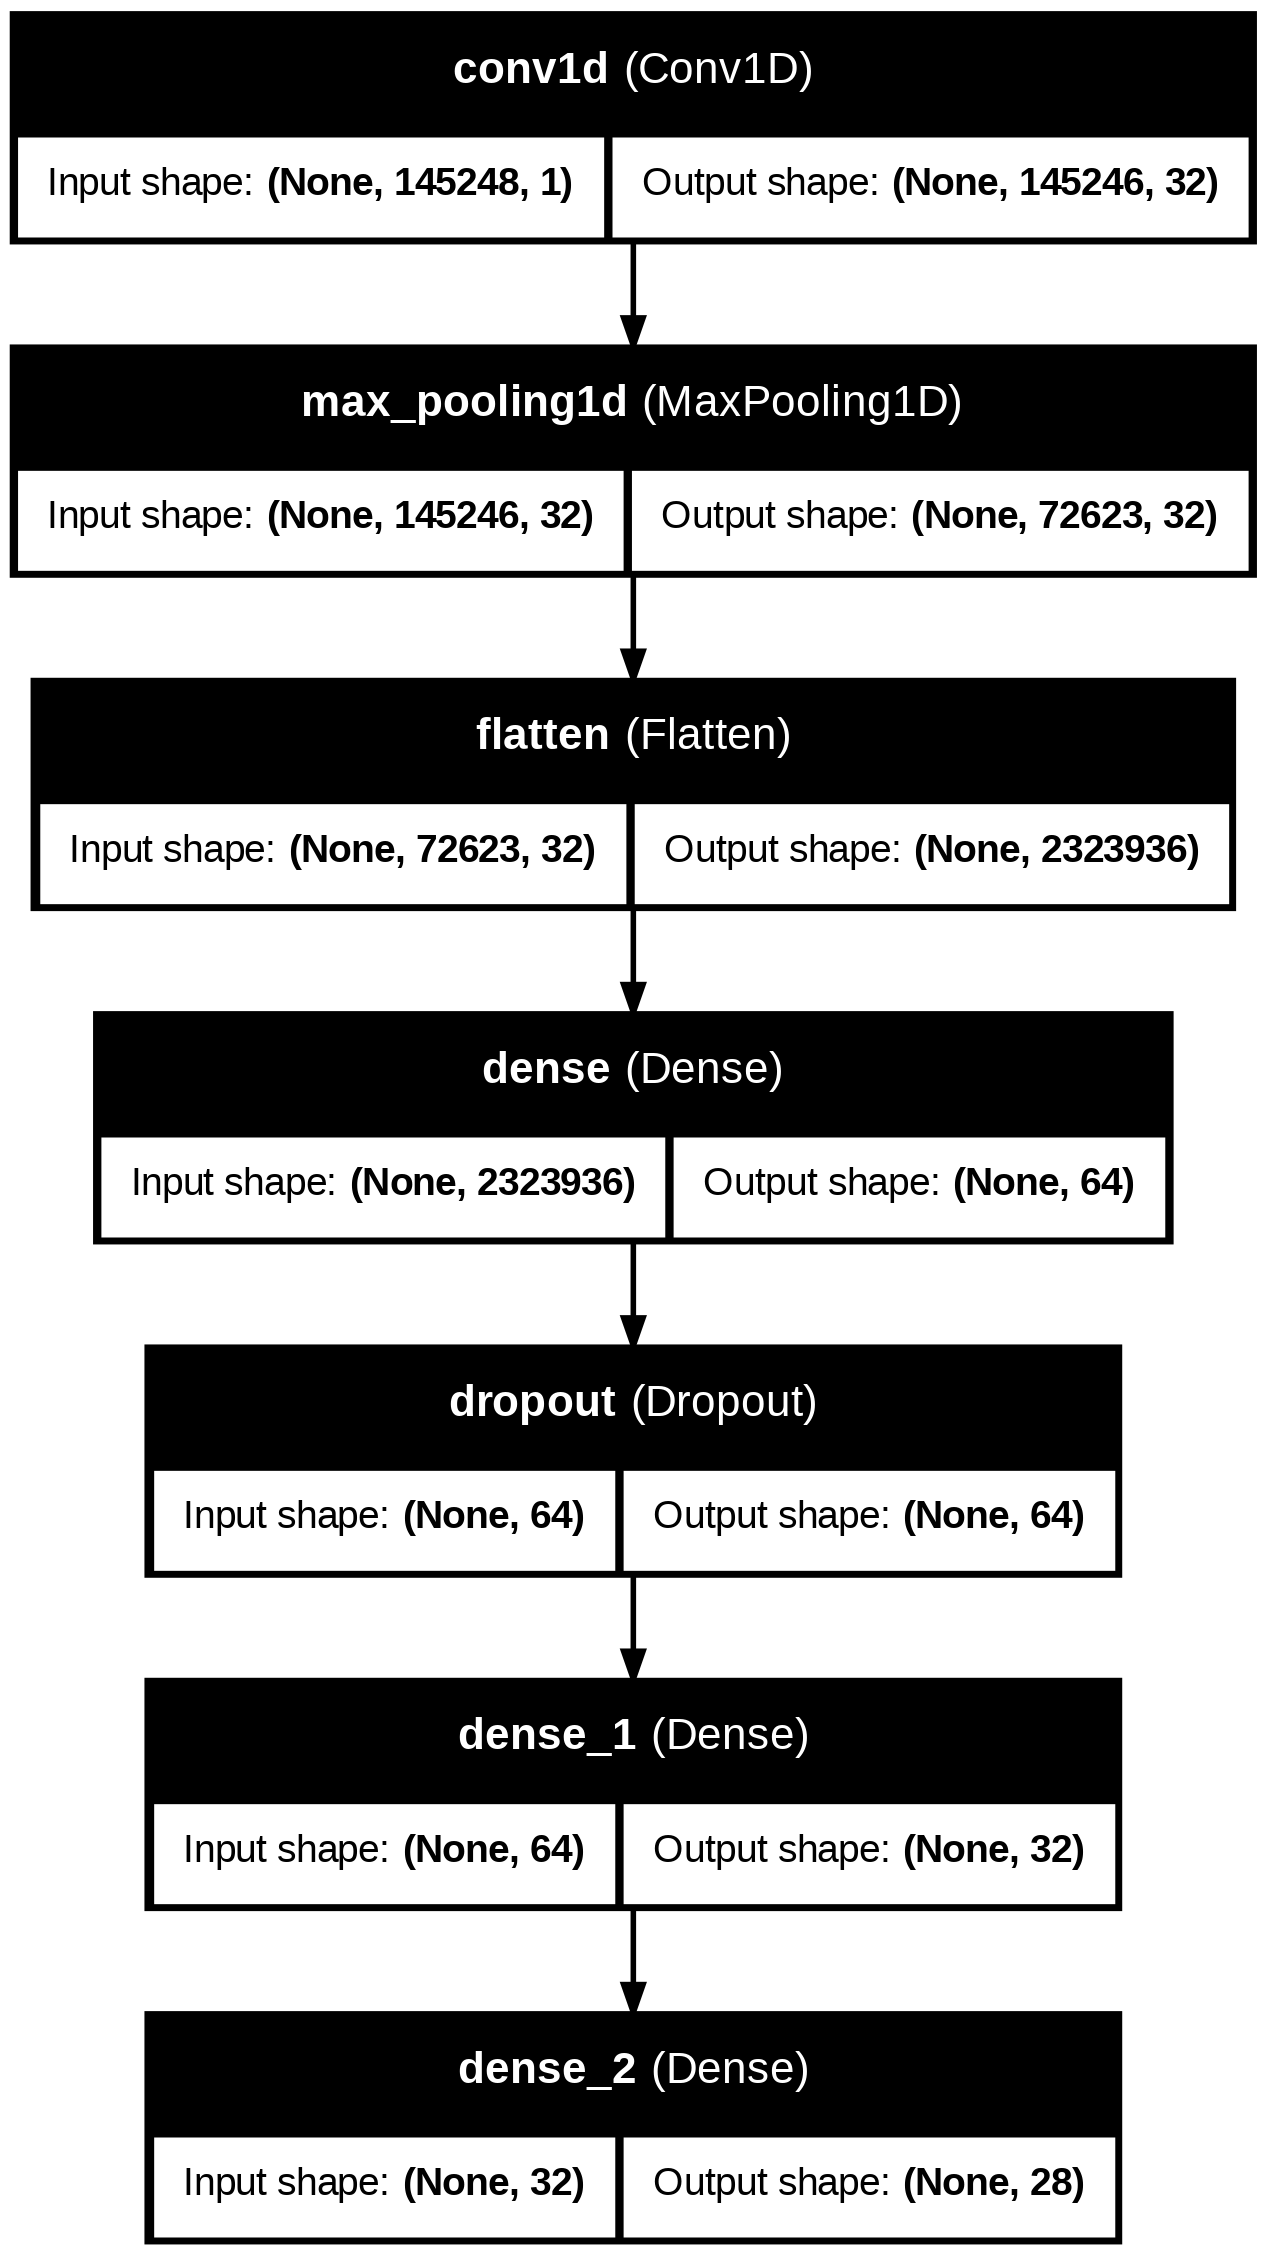

In [16]:
# Visualize the models
tf.keras.utils.plot_model(cnn_model_1gram, show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(cnn_model_2gram, show_shapes=True, show_layer_names=True)